# Imports and set up

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '/home/dreamtim/Coding/ITMO/itmo-cpp/with_descriptors.csv'
SEED = 42

# Load the data

In [3]:
df = pd.read_csv(DATA_PATH)
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,is_valid_smiles,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,3151.8362,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,True,0.192308,10.653846,11.608322,0.538462,0.230769,0.230769,0.0,0.0,-1.492308
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,2785.1939,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,True,0.136364,115.700455,11.839377,0.227273,0.181818,0.318182,1490.0,1490.0,-1.272727
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRKRRRRRE,...,True,0.000000,328.000000,11.999968,0.300000,0.000000,0.000000,0.0,0.0,-3.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,246.2205,yes,Enantiomer Mix,GGGG,...,True,0.000000,100.050000,5.525000,0.000000,1.000000,0.000000,0.0,0.0,-0.400000
2919,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,2269.8105,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,True,0.045455,-0.995455,10.176286,0.681818,0.181818,0.409091,1490.0,1490.0,0.854545
2920,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['sequence', 'extra_name', 'cpp_category', 'seq_length', 'cpp_type',
       'origin', 'mol_weight', 'is_cpp_3', 'sequence_category',
       'standard_sequence', 'nh3_tail', 'po3_pos', 'biotinylated',
       'acylated_n_terminal', 'cyclic', 'amidated', 'stearyl_uptake',
       'hexahistidine_tagged', 'modifications', 'adjusted_sequence',
       'smiles_sequence', 'is_valid_smiles', 'aromaticity',
       'instability_index', 'isoelectric_point', 'helix_fraction',
       'turn_fraction', 'sheet_fraction',
       'molar_extinction_coefficient_reduced',
       'molar_extinction_coefficient_oxidized', 'gravy'],
      dtype='object')

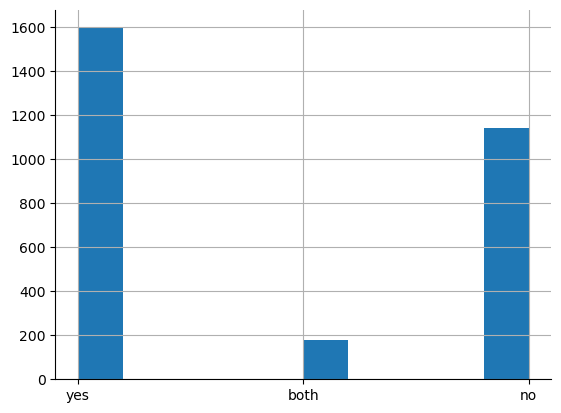

In [5]:
df.is_cpp_3.hist()
sns.despine()
plt.show()

In [6]:
df_filtered = df.pipe(
    lambda x: x[x.is_cpp_3.isin(['yes', 'no'])]
).pipe(
    lambda x: x[x.standard_sequence.notna()]
)

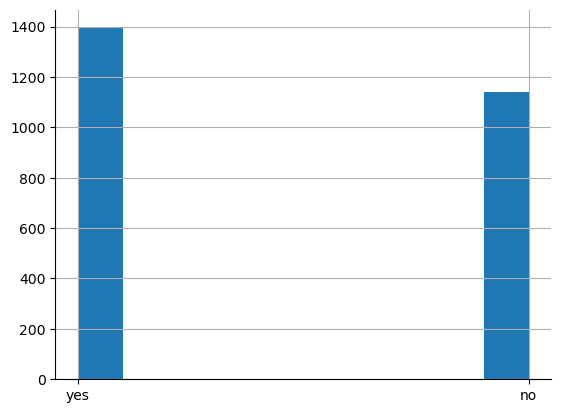

In [7]:
df_filtered.is_cpp_3.hist()
sns.despine()
plt.show()

**Dataset is ballanced!**

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 2921
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sequence                               2538 non-null   object 
 1   extra_name                             121 non-null    object 
 2   cpp_category                           747 non-null    object 
 3   seq_length                             2538 non-null   int64  
 4   cpp_type                               76 non-null     object 
 5   origin                                 7 non-null      object 
 6   mol_weight                             2538 non-null   float64
 7   is_cpp_3                               2538 non-null   object 
 8   sequence_category                      2538 non-null   object 
 9   standard_sequence                      2538 non-null   object 
 10  nh3_tail                               2538 non-null   bool   
 11  po3_pos  

Full info:

```
<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 2921
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sequence                               2538 non-null   object 
 1   extra_name                             121 non-null    object 
 2   cpp_category                           747 non-null    object 
 3   seq_length                             2538 non-null   int64  
 4   cpp_type                               76 non-null     object 
 5   origin                                 7 non-null      object 
 6   mol_weight                             2538 non-null   float64
 7   is_cpp_3                               2538 non-null   object 
 8   sequence_category                      2538 non-null   object 
 9   standard_sequence                      2538 non-null   object 
 10  nh3_tail                               2538 non-null   bool   
 11  po3_pos                                2538 non-null   bool   
 12  biotinylated                           2538 non-null   bool   
 13  acylated_n_terminal                    2538 non-null   bool   
 14  cyclic                                 2538 non-null   bool   
 15  amidated                               2538 non-null   bool   
 16  stearyl_uptake                         2538 non-null   bool   
 17  hexahistidine_tagged                   2538 non-null   bool   
 18  modifications                          2538 non-null   object 
 19  adjusted_sequence                      2538 non-null   object 
 20  smiles_sequence                        2533 non-null   object 
 21  is_valid_smiles                        2538 non-null   bool   
 22  aromaticity                            2538 non-null   float64
 23  instability_index                      2538 non-null   float64
 24  isoelectric_point                      2538 non-null   float64
 25  helix_fraction                         2538 non-null   float64
 26  turn_fraction                          2538 non-null   float64
 27  sheet_fraction                         2538 non-null   float64
 28  molar_extinction_coefficient_reduced   2538 non-null   float64
 29  molar_extinction_coefficient_oxidized  2538 non-null   float64
 30  gravy                                  2538 non-null   float64
dtypes: bool(9), float64(10), int64(1), object(11)
memory usage: 478.4+ KB
```

# Baseline models

NOTE: DEPENDENCIES ARE IN `requirements.txt` and `environment.yml`

In [9]:
# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Classification

In [10]:
# For classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

##### Prepare 

In [109]:
columns_to_drop = [
    'extra_name', 'cpp_category', 'cpp_type', 'origin',
    'sequence', 'standard_sequence', 'adjusted_sequence',
    'smiles_sequence', 'modifications', 'sequence_category', 'is_valid_smiles'
]

df_clean = df_filtered.drop(columns=columns_to_drop)
print('Columns after dropping:')
for col in df_clean.columns:
    print(col)

Columns after dropping:
seq_length
mol_weight
is_cpp_3
nh3_tail
po3_pos
biotinylated
acylated_n_terminal
cyclic
amidated
stearyl_uptake
hexahistidine_tagged
aromaticity
instability_index
isoelectric_point
helix_fraction
turn_fraction
sheet_fraction
molar_extinction_coefficient_reduced
molar_extinction_coefficient_oxidized
gravy


In [110]:
df_encoded = df_clean.copy()
bool_cols = df_encoded.columns[df_encoded.dtypes == 'bool'].tolist()
for col in bool_cols:
    df_encoded[col] = df_encoded[col].astype(int)

In [111]:
# Check for missing values
print(f"Missing values before imputation:\n{df_encoded.isnull().sum()}")

Missing values before imputation:
seq_length                               0
mol_weight                               0
is_cpp_3                                 0
nh3_tail                                 0
po3_pos                                  0
biotinylated                             0
acylated_n_terminal                      0
cyclic                                   0
amidated                                 0
stearyl_uptake                           0
hexahistidine_tagged                     0
aromaticity                              0
instability_index                        0
isoelectric_point                        0
helix_fraction                           0
turn_fraction                            0
sheet_fraction                           0
molar_extinction_coefficient_reduced     0
molar_extinction_coefficient_oxidized    0
gravy                                    0
dtype: int64


In [112]:
# Encode target variable
label_encoder = LabelEncoder()
df_encoded['is_cpp_3'] = label_encoder.fit_transform(df_encoded['is_cpp_3'])

# Verify encoding
print(df_encoded['is_cpp_3'].value_counts())

is_cpp_3
1    1397
0    1141
Name: count, dtype: int64


In [113]:
# Define features and target
X = df_encoded.drop('is_cpp_3', axis=1)
y = df_encoded['is_cpp_3']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (2538, 19)
Target vector shape: (2538,)


In [114]:
# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (2030, 19)
Testing set shape: (508, 19)


In [115]:
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    """
    Plots a confusion matrix using seaborn heatmap.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    labels (list): List of label names.
    title (str): Title of the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

##### Logistic regression

In [116]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       228
           1       0.81      0.84      0.82       280

    accuracy                           0.80       508
   macro avg       0.80      0.80      0.80       508
weighted avg       0.80      0.80      0.80       508



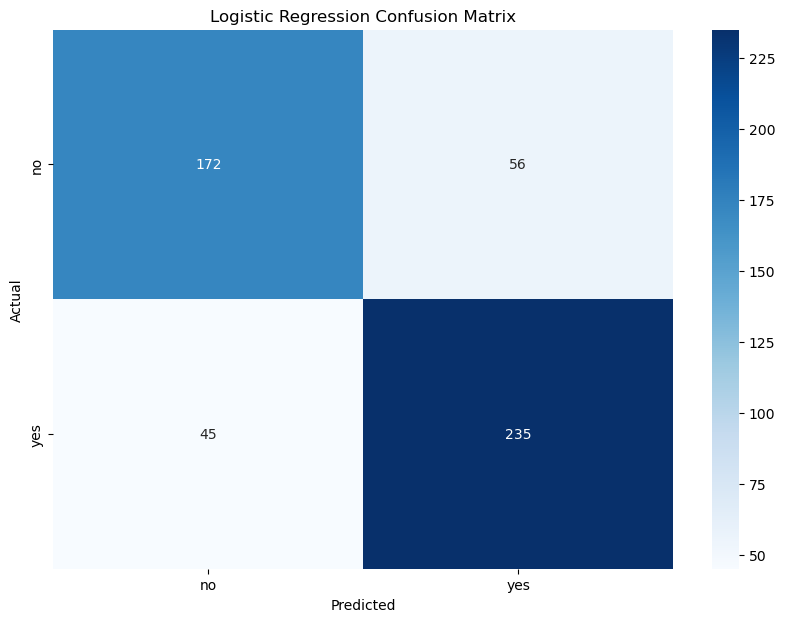

In [117]:
plot_confusion_matrix(y_test, y_pred_lr, labels=['no', 'yes'], title='Logistic Regression Confusion Matrix')

##### Decision Tree Classifier

In [118]:
# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       228
           1       0.80      0.86      0.83       280

    accuracy                           0.81       508
   macro avg       0.81      0.80      0.80       508
weighted avg       0.81      0.81      0.80       508



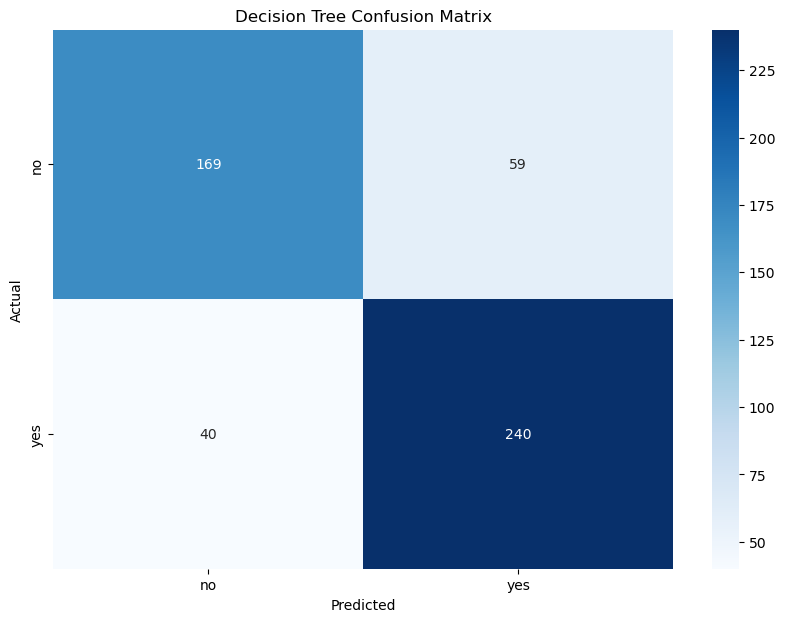

In [119]:
plot_confusion_matrix(y_test, y_pred_dt, labels=['no', 'yes'], title='Decision Tree Confusion Matrix')

##### Random Forest Classifier

In [120]:
# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       228
           1       0.89      0.86      0.87       280

    accuracy                           0.86       508
   macro avg       0.86      0.86      0.86       508
weighted avg       0.86      0.86      0.86       508



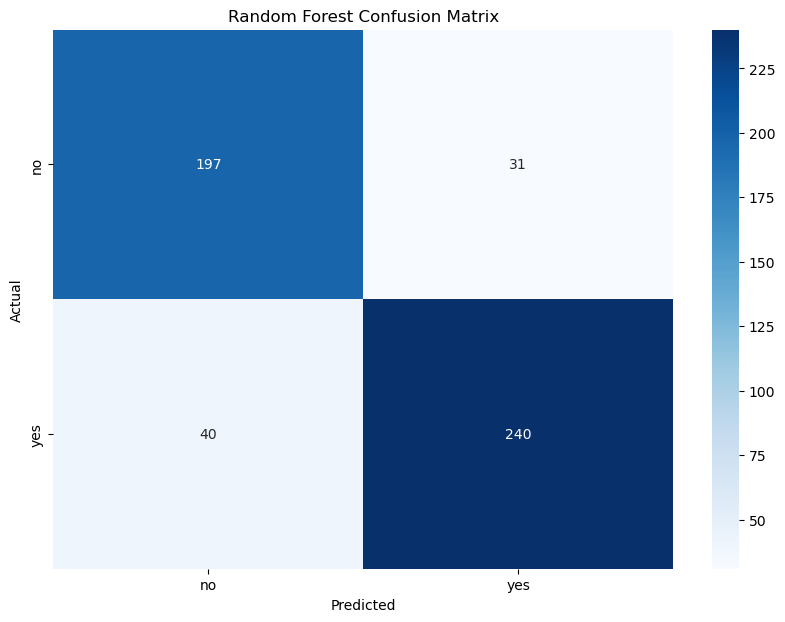

In [121]:
plot_confusion_matrix(y_test, y_pred_rf, labels=['no', 'yes'], title='Random Forest Confusion Matrix')

##### SVM

In [122]:
# Initialize SVM
svm_clf = SVC(probability=True, random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43       228
           1       0.60      0.81      0.69       280

    accuracy                           0.60       508
   macro avg       0.59      0.57      0.56       508
weighted avg       0.59      0.60      0.57       508



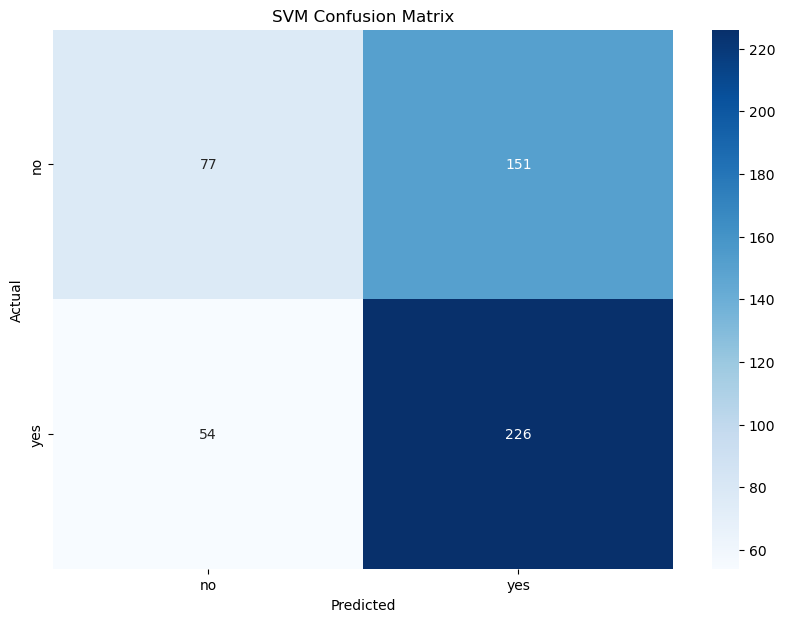

In [123]:
plot_confusion_matrix(y_test, y_pred_svm, labels=['no', 'yes'], title='SVM Confusion Matrix')

##### Catboost

In [124]:
from catboost import CatBoostClassifier

# Initialize CatBoost
cat_clf = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_state=42, verbose=0)

# Train the model
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_cat = cat_clf.predict(X_test)

# Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       228
           1       0.88      0.90      0.89       280

    accuracy                           0.88       508
   macro avg       0.88      0.88      0.88       508
weighted avg       0.88      0.88      0.88       508



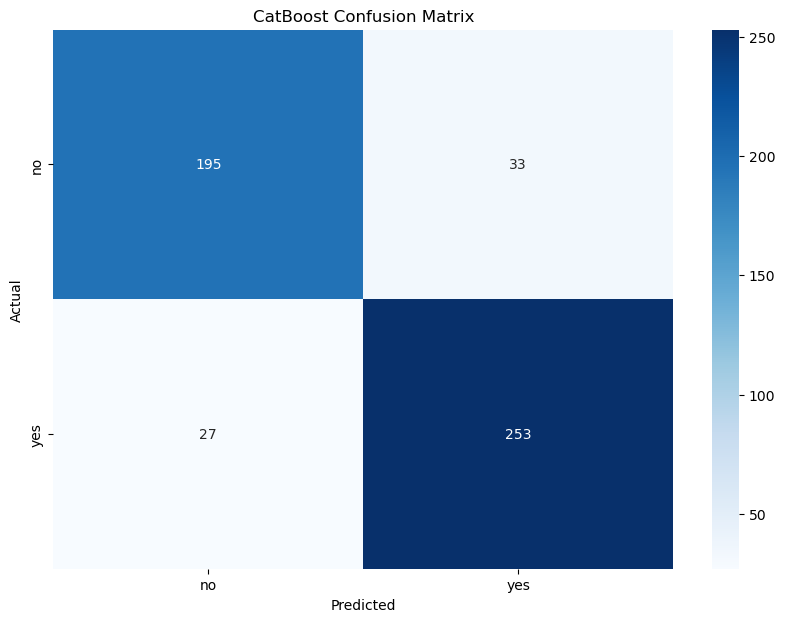

In [125]:
plot_confusion_matrix(y_test, y_pred_cat, labels=['no', 'yes'], title='CatBoost Confusion Matrix')

##### Summary

In [126]:
# Function to calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    }

# Evaluate all models and store the results in a list
results = []
results.append(evaluate_model(y_test, y_pred_lr, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_svm, "SVM"))
results.append(evaluate_model(y_test, y_pred_cat, "CatBoost"))

# Create a DataFrame from the results
metrics_df = pd.DataFrame(results)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.801181,0.807560,0.839286,0.823117
1,Decision Tree,0.805118,0.802676,0.857143,0.829016
2,Random Forest,0.860236,0.885609,0.857143,0.871143
3,SVM,0.596457,0.599469,0.807143,0.687976
4,CatBoost,0.881890,0.884615,0.903571,0.893993


In [127]:
# Print the best model based on the F1-Score
best_model = metrics_df.sort_values('F1-Score', ascending=False).iloc[0]
print(f"Best model based on F1-Score:\n{best_model}")

Best model based on F1-Score:
Model        CatBoost
Accuracy      0.88189
Precision    0.884615
Recall       0.903571
F1-Score     0.893993
Name: 4, dtype: object


##### Feature importances

In [128]:
import shap

In [129]:
catboost_explainer = shap.TreeExplainer(cat_clf)
shap_values = catboost_explainer.shap_values(X_test)

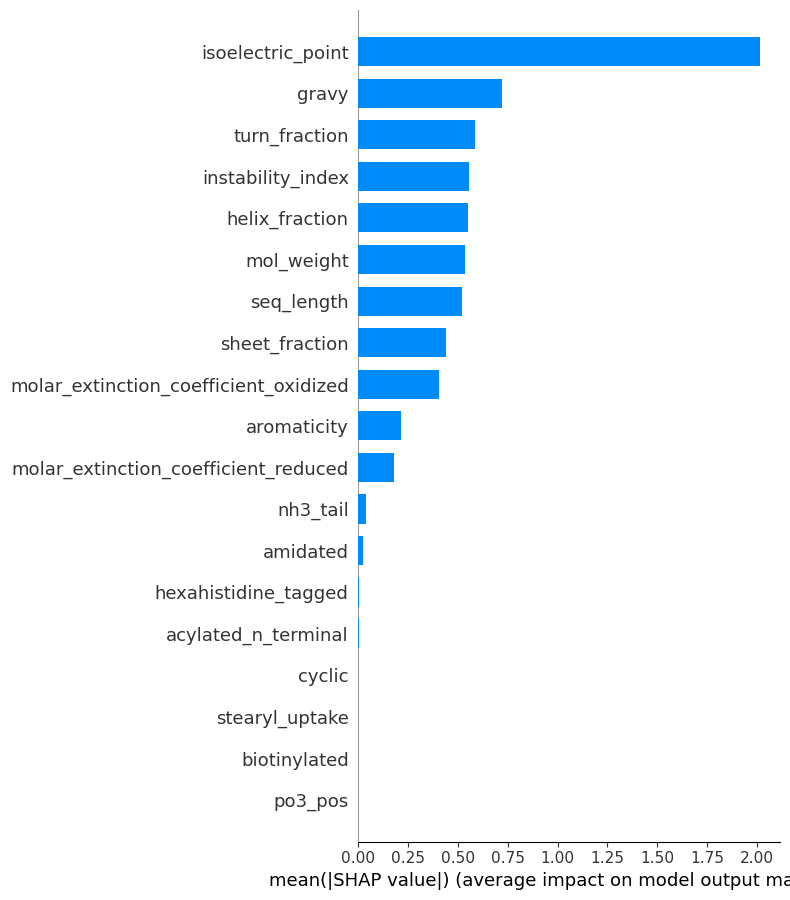

In [130]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

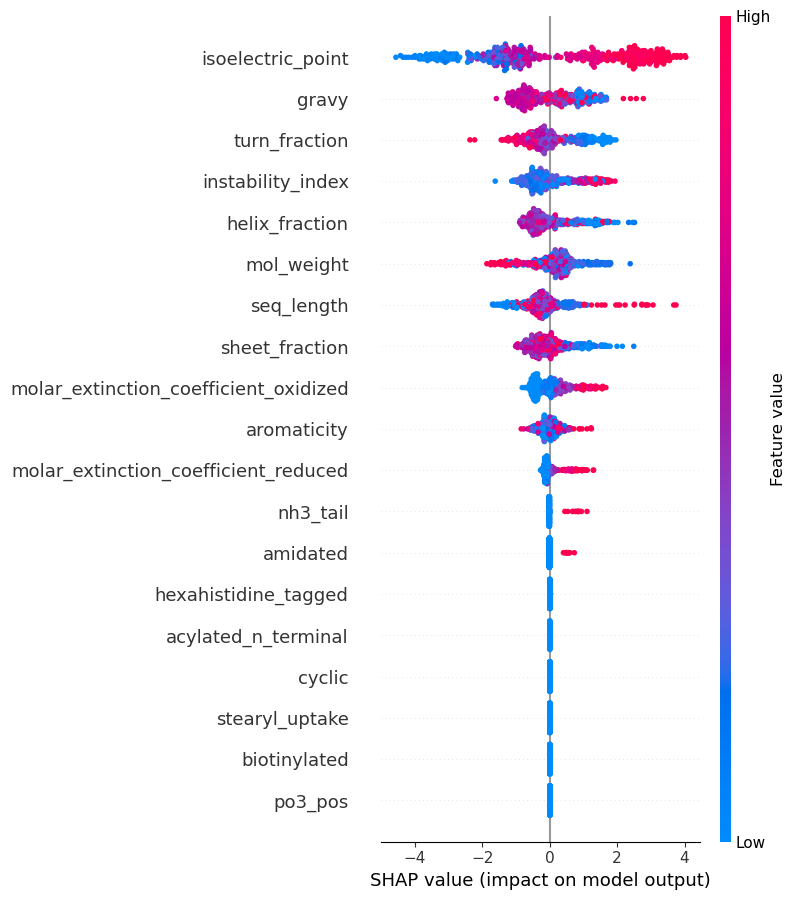

In [131]:
shap.summary_plot(shap_values, X_test)

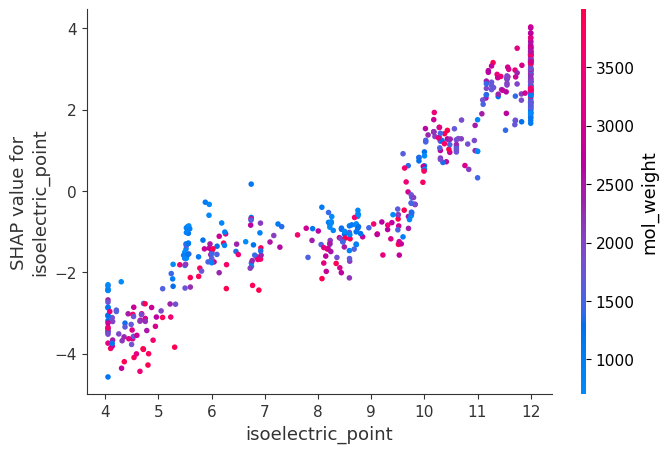

In [132]:
shap.dependence_plot('isoelectric_point', shap_values, X_test)

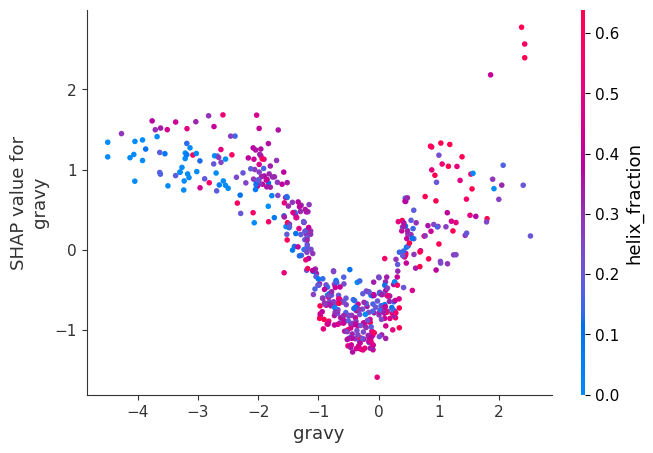

In [133]:
shap.dependence_plot('gravy', shap_values, X_test)

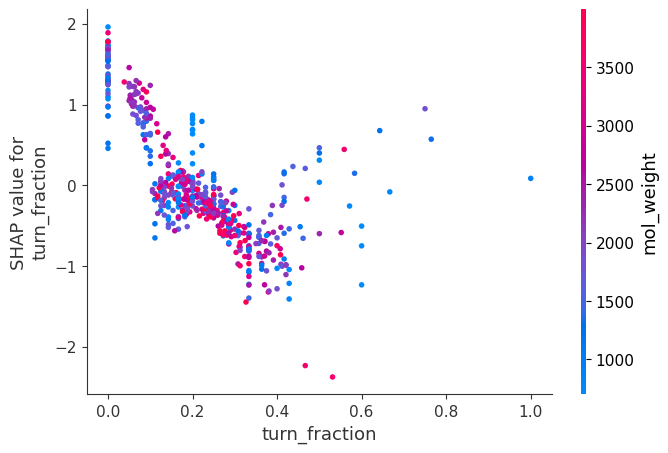

In [134]:
shap.dependence_plot('turn_fraction', shap_values, X_test)

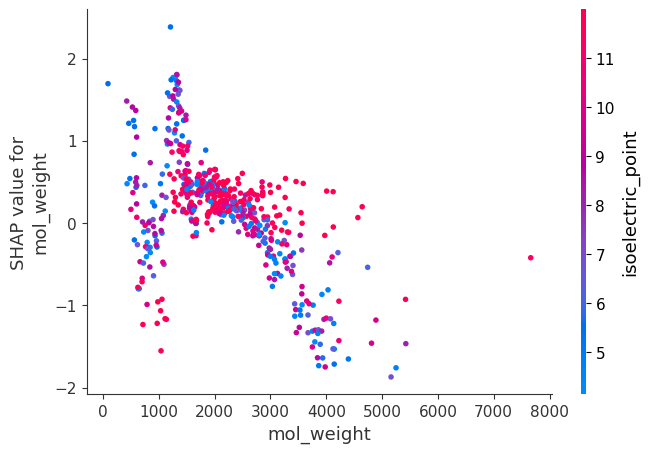

In [135]:
shap.dependence_plot('mol_weight', shap_values, X_test)

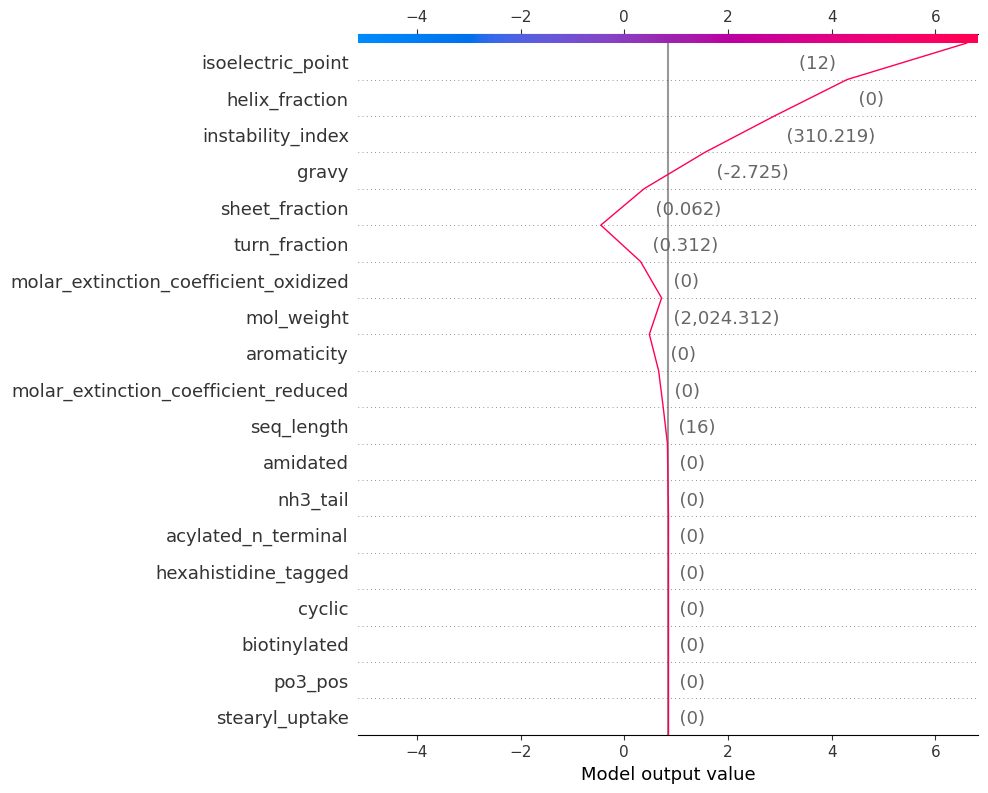

In [136]:
shap.decision_plot(catboost_explainer.expected_value, shap_values[0], X_test.iloc[0])

### Classification with embeddings

In [141]:
PROTBERT_PATH = '/home/dreamtim/Coding/ITMO/itmo-cpp/protbert_embeddings.npy'

##### Prepare

In [142]:
protbert_embeddings = np.load(PROTBERT_PATH)
protbert_embeddings.shape

(2922, 1024)

In [145]:
df_with_embeddings = df.copy()
for i in range(protbert_embeddings.shape[1]):
    df_with_embeddings[f'protbert_{i}'] = protbert_embeddings[:, i]

df_with_embeddings

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,protbert_1014,protbert_1015,protbert_1016,protbert_1017,protbert_1018,protbert_1019,protbert_1020,protbert_1021,protbert_1022,protbert_1023
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,3151.8362,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,0.057060,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,2785.1939,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,0.057060,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,0.057145,-0.042504,-0.028737,0.025453,-0.12837,-0.130971,0.026359,-0.086802,-0.114563,-0.01310
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,0.057145,-0.042504,-0.028737,0.025453,-0.12837,-0.130971,0.026359,-0.086802,-0.114563,-0.01310
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRKRRRRRE,...,0.057060,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,0.057145,-0.042504,-0.028737,0.025453,-0.12837,-0.130972,0.026359,-0.086802,-0.114563,-0.01310
2918,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,246.2205,yes,Enantiomer Mix,GGGG,...,0.057060,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299
2919,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,2269.8105,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,0.057060,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299
2920,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,0.057145,-0.042504,-0.028737,0.025453,-0.12837,-0.130972,0.026359,-0.086802,-0.114563,-0.01310


In [146]:
df_with_embeddings_filtered = df_with_embeddings.pipe(
    lambda x: x[x.is_cpp_3.isin(['yes', 'no'])]
).pipe(
    lambda x: x[x.standard_sequence.notna()]
)

In [155]:
df_with_embeddings_filtered

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,protbert_1014,protbert_1015,protbert_1016,protbert_1017,protbert_1018,protbert_1019,protbert_1020,protbert_1021,protbert_1022,protbert_1023
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,3151.8362,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,2785.1939,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRKRRRRRE,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
5,?A-RRR-[KRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRRKRRRRE,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
6,?A-RRRR-[KRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRRRKRRRE,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086843,-0.114472,-0.01299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,stearyl-HHHHHHHHHHHHHHHH-RRRRRRRR-NH2,NaN,NaN,37,NaN,NaN,3712.9716,yes,Repeating Segments,HHHHHHHHHHHHHHHHRRRRRRRRNH,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299
2913,stearyl-HHHHHHHHHHHHHHHH-RRRRRRRR-NH3,NaN,NaN,37,NaN,NaN,3712.9716,yes,Peptide with Substitutions,HHHHHHHHHHHHHHHHRRRRRRRRNH,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299
2918,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,246.2205,yes,Enantiomer Mix,GGGG,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299
2919,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,2269.8105,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,0.05706,-0.042467,-0.028786,0.025413,-0.12811,-0.130808,0.026238,-0.086842,-0.114472,-0.01299


['extra_name',
 'cpp_category',
 'cpp_type',
 'origin',
 'sequence',
 'standard_sequence',
 'adjusted_sequence',
 'smiles_sequence',
 'modifications',
 'sequence_category',
 'is_valid_smiles']

In [159]:
columns_to_drop_for_embeddings = df_with_embeddings_filtered.columns.to_list()
# Rempve target and embeddings columns from to drop list
columns_to_drop_for_embeddings = [col for col in columns_to_drop_for_embeddings if not (col.startswith('protbert') or col == 'is_cpp_3')]

df_with_embeddings_clean = df_with_embeddings_filtered.drop(columns=columns_to_drop_for_embeddings)

In [160]:
df_with_embeddings_encoded = df_with_embeddings_clean.copy()
bool_cols = df_with_embeddings_encoded.columns[df_with_embeddings_encoded.dtypes == 'bool'].tolist()
for col in bool_cols:
    df_with_embeddings_encoded[col] = df_with_embeddings_encoded[col].astype(int)

df_with_embeddings_encoded['is_cpp_3'] = label_encoder.fit_transform(df_with_embeddings_encoded['is_cpp_3'])

X_emb = df_with_embeddings_encoded.drop('is_cpp_3', axis=1)
y_emb = df_with_embeddings_encoded['is_cpp_3']

X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_emb, y_emb, test_size=0.2, random_state=42, stratify=y_emb
)

In [167]:
# print shapes
print(f"Training set shape: {X_train_emb.shape}")
print(f"Testing set shape: {X_test_emb.shape}")

Training set shape: (2030, 1024)
Testing set shape: (508, 1024)


##### CatBoost

In [161]:
cat_clf_emb = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, random_state=42, verbose=0)

cat_clf_emb.fit(X_train_emb, y_train_emb)

In [162]:
y_pred_cat_emb = cat_clf_emb.predict(X_test_emb)

print("CatBoost with ProtBert Classification Report:")
print(classification_report(y_test_emb, y_pred_cat_emb))

CatBoost with ProtBert Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.55      1.00      0.71       280

    accuracy                           0.55       508
   macro avg       0.28      0.50      0.36       508
weighted avg       0.30      0.55      0.39       508



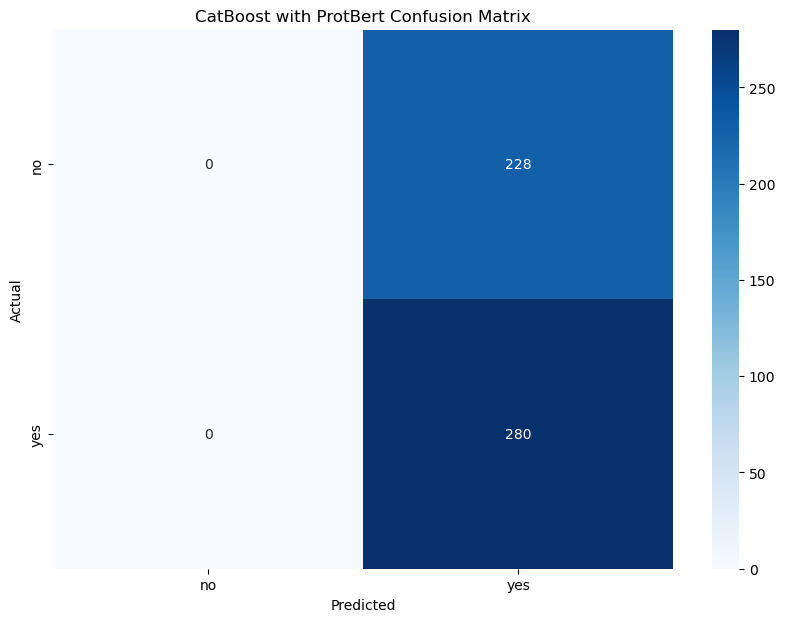

In [163]:
plot_confusion_matrix(y_test_emb, y_pred_cat_emb, labels=['no', 'yes'], title='CatBoost with ProtBert Confusion Matrix')

##### Simple neural network

In [168]:
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cuda


In [169]:
# Example placeholder: Replace with actual data loading
# X_train_emb: Training embeddings of shape (2030, 1024)
# X_test_emb: Testing embeddings of shape (508, 1024)
# y_train: Training labels of shape (2030,)
# y_test: Testing labels of shape (508,)

# For demonstration, let's create dummy data
# Remove or replace this with your actual data
from sklearn.datasets import make_classification

X_train_emb, y_train = make_classification(n_samples=2030, n_features=1024, n_informative=50, n_redundant=0, 
                                           n_classes=2, random_state=42)
X_test_emb, y_test = make_classification(n_samples=508, n_features=1024, n_informative=50, n_redundant=0,
                                         n_classes=2, random_state=4242)


In [170]:
from torch.utils.data import Dataset, DataLoader, random_split

class ProteinEmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        """
        Args:
            embeddings (np.array or torch.Tensor): Feature embeddings.
            labels (np.array or torch.Tensor): Corresponding labels.
        """
        if isinstance(embeddings, np.ndarray):
            self.X = torch.tensor(embeddings, dtype=torch.float32)
        else:
            self.X = embeddings.float()
        
        if isinstance(labels, np.ndarray):
            self.y = torch.tensor(labels, dtype=torch.float32)
        else:
            self.y = labels.float()
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [171]:
# Create Dataset instances
train_dataset = ProteinEmbeddingDataset(X_train_emb, y_train)
test_dataset = ProteinEmbeddingDataset(X_test_emb, y_test)

# Optionally, create a validation set from the training data
validation_split = 0.1
train_size = int((1 - validation_split) * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Training samples: 1827
Validation samples: 203
Testing samples: 508


In [172]:
batch_size = 64  # Adjust based on your GPU memory

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [177]:
import torch.nn as nn
import torch.nn.functional as F

class EnhancedNN(nn.Module):
    def __init__(self, input_size=1024, hidden_sizes=[1024, 512, 256], dropout_prob=0.3):
        super(EnhancedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(hidden_sizes[0])
        self.dropout1 = nn.Dropout(dropout_prob)
        
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.bn2 = nn.BatchNorm1d(hidden_sizes[1])
        self.dropout2 = nn.Dropout(dropout_prob)
        
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.bn3 = nn.BatchNorm1d(hidden_sizes[2])
        self.dropout3 = nn.Dropout(dropout_prob)
        
        self.fc4 = nn.Linear(hidden_sizes[2], 1)  # Binary classification
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        return x  # BCEWithLogitsLoss applies sigmoid internally

In [178]:
import torch.optim as optim

# Initialize the enhanced model
model = EnhancedNN(input_size=1024, hidden_sizes=[1024, 512, 256], dropout_prob=0.3)
model.to(device)

# Use BCEWithLogitsLoss for numerical stability
criterion = nn.BCEWithLogitsLoss()

# Adjust the learning rate if necessary
optimizer = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Early Stopping Parameters
patience = 50
best_val_loss = np.inf
epochs_no_improve = 0
num_epochs = 500  # Maximum number of epochs

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1)  # Reshape for BCEWithLogitsLoss
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device).unsqueeze(1)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate accuracy
            preds = torch.sigmoid(outputs) >= 0.5
            correct += (preds.float() == labels).sum().item()
            total += labels.size(0)
    
    val_loss /= len(val_loader.dataset)
    val_accuracy = correct / total
    scheduler.step()
    
    print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')
    
    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_enhanced_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break


Epoch 1/500 - Training Loss: 0.5353 - Validation Loss: 0.4000 - Validation Accuracy: 0.8079
Epoch 2/500 - Training Loss: 0.1936 - Validation Loss: 0.3013 - Validation Accuracy: 0.8571
Epoch 3/500 - Training Loss: 0.0554 - Validation Loss: 0.3452 - Validation Accuracy: 0.8818
Epoch 4/500 - Training Loss: 0.0220 - Validation Loss: 0.4252 - Validation Accuracy: 0.8473
Epoch 5/500 - Training Loss: 0.0133 - Validation Loss: 0.4342 - Validation Accuracy: 0.8621
Epoch 6/500 - Training Loss: 0.0107 - Validation Loss: 0.4410 - Validation Accuracy: 0.8621
Epoch 7/500 - Training Loss: 0.0063 - Validation Loss: 0.4508 - Validation Accuracy: 0.8670
Epoch 8/500 - Training Loss: 0.0039 - Validation Loss: 0.4649 - Validation Accuracy: 0.8768
Epoch 9/500 - Training Loss: 0.0026 - Validation Loss: 0.4548 - Validation Accuracy: 0.8719
Epoch 10/500 - Training Loss: 0.0034 - Validation Loss: 0.4801 - Validation Accuracy: 0.8621
Epoch 11/500 - Training Loss: 0.0018 - Validation Loss: 0.5191 - Validation Acc

### EDA of the embeddings

In [179]:
import numpy as np
import pandas as pd

# Example label encoding (if needed)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts 'yes'/'no' to 1/0
y_test_encoded = label_encoder.transform(y_test)


In [180]:
X_combined = np.vstack((X_train_emb, X_test_emb))
y_combined = np.hstack((y_train_encoded, y_test_encoded))


##### Dimensionality reduction

In [184]:
df_pca

,PC1,PC2
0,-7.481035,-0.714853
1,9.463407,-4.785004
2,1.525628,3.916002
3,0.148067,0.083522
4,6.990986,-6.240768
...,...,...
2533,-1.575626,4.480848
2534,2.011782,3.140438
2535,0.268320,-0.091317
2536,-1.818324,-0.813591


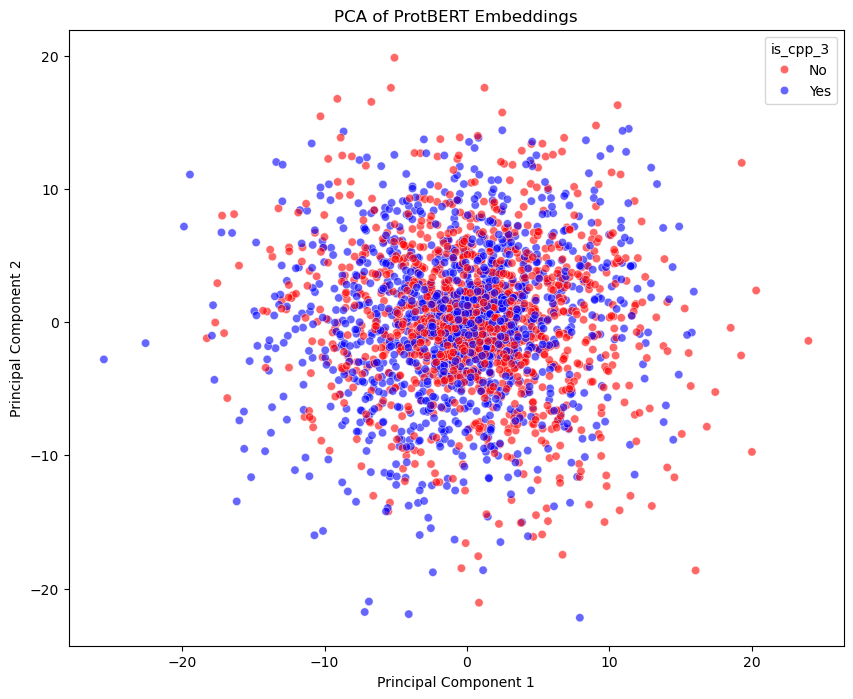

In [187]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = ['No' if label == 0 else 'Yes' for label in y_combined]  # Ensure 'Class' column with 'No'/'Yes'

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', palette=['red', 'blue'], data=df_pca, alpha=0.6)
plt.title('PCA of ProtBERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='is_cpp_3')  # Correct legend title
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2538 samples in 0.007s...
[t-SNE] Computed neighbors for 2538 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2538
[t-SNE] Computed conditional probabilities for sample 2000 / 2538
[t-SNE] Computed conditional probabilities for sample 2538 / 2538
[t-SNE] Mean sigma: 9.567110
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.357742
[t-SNE] KL divergence after 1000 iterations: 2.583160


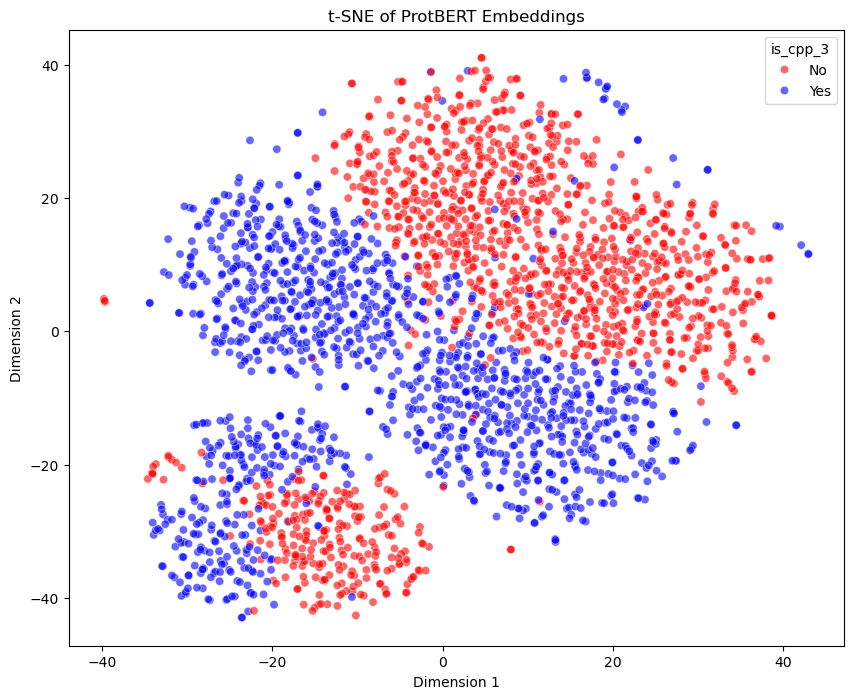

In [189]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42, verbose=1)
X_tsne = tsne.fit_transform(X_combined)

# Create DataFrame for plotting
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Class'] = ['No' if label == 0 else 'Yes' for label in y_combined]  # Assign 'No'/'Yes' labels

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Class', palette=['red', 'blue'], data=df_tsne, alpha=0.6)
plt.title('t-SNE of ProtBERT Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='is_cpp_3')
plt.show()

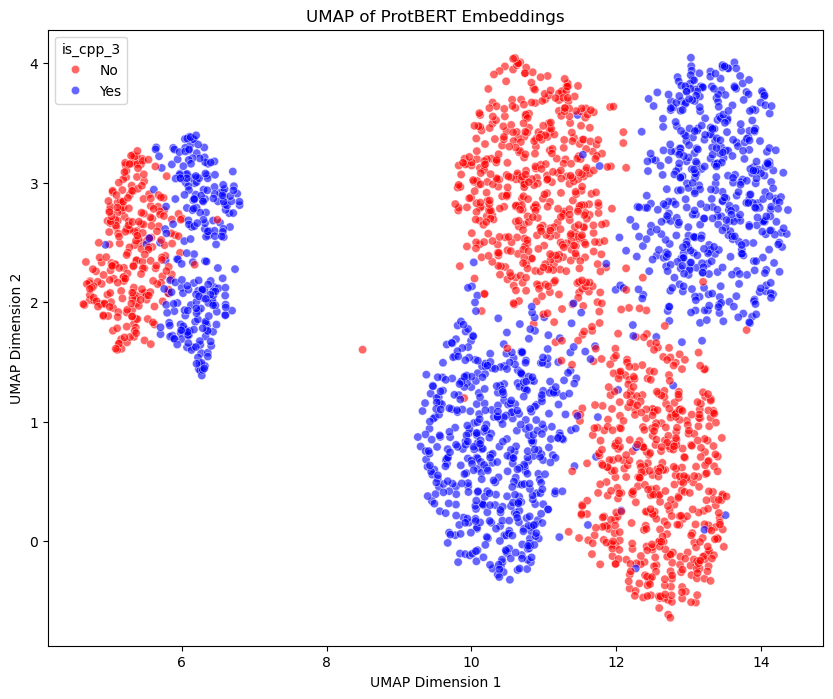

In [192]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_combined)

# Create DataFrame for plotting
df_umap = pd.DataFrame(data=X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Class'] = ['No' if label == 0 else 'Yes' for label in y_combined]  # Map labels to 'No'/'Yes'

# Plot UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Class', palette=['red', 'blue'], data=df_umap, alpha=0.6)
plt.title('UMAP of ProtBERT Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='is_cpp_3')
plt.show()


##### Strange heatmaps

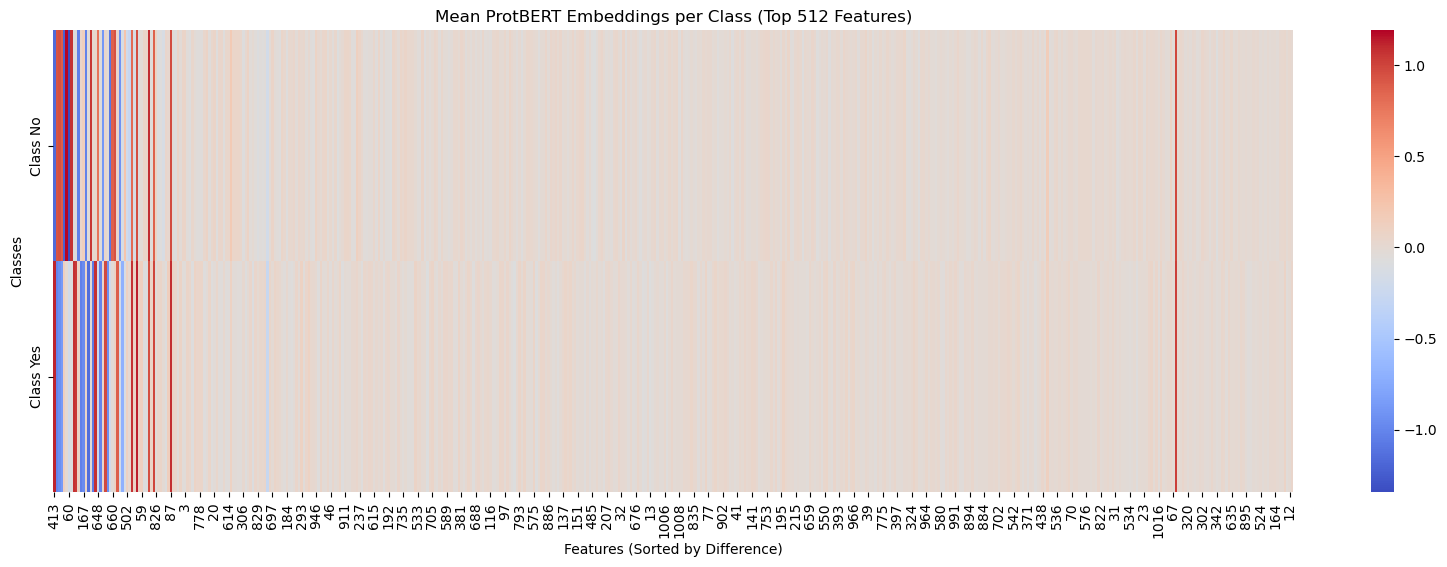

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X_train_emb is your training embeddings (numpy array of shape (2030, 1024))
# and y_train is your corresponding labels (numpy array of shape (2030,))

# Compute mean embeddings for each class
mean_no = X_train_emb[y_train == 0].mean(axis=0)
mean_yes = X_train_emb[y_train == 1].mean(axis=0)

# Create a DataFrame
df_means = pd.DataFrame({
    'Class No': mean_no,
    'Class Yes': mean_yes
})

# Calculate absolute difference and sort features by this difference
df_means['Diff'] = abs(df_means['Class Yes'] - df_means['Class No'])
df_means = df_means.sort_values('Diff', ascending=False).drop('Diff', axis=1)

# Select only the top 512 features with the highest difference
df_means = df_means.head(512)

# Plot the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df_means.T, annot=False, cmap='coolwarm', cbar=True)
plt.title('Mean ProtBERT Embeddings per Class (Top 512 Features)')
plt.xlabel('Features (Sorted by Difference)')
plt.ylabel('Classes')
plt.show()

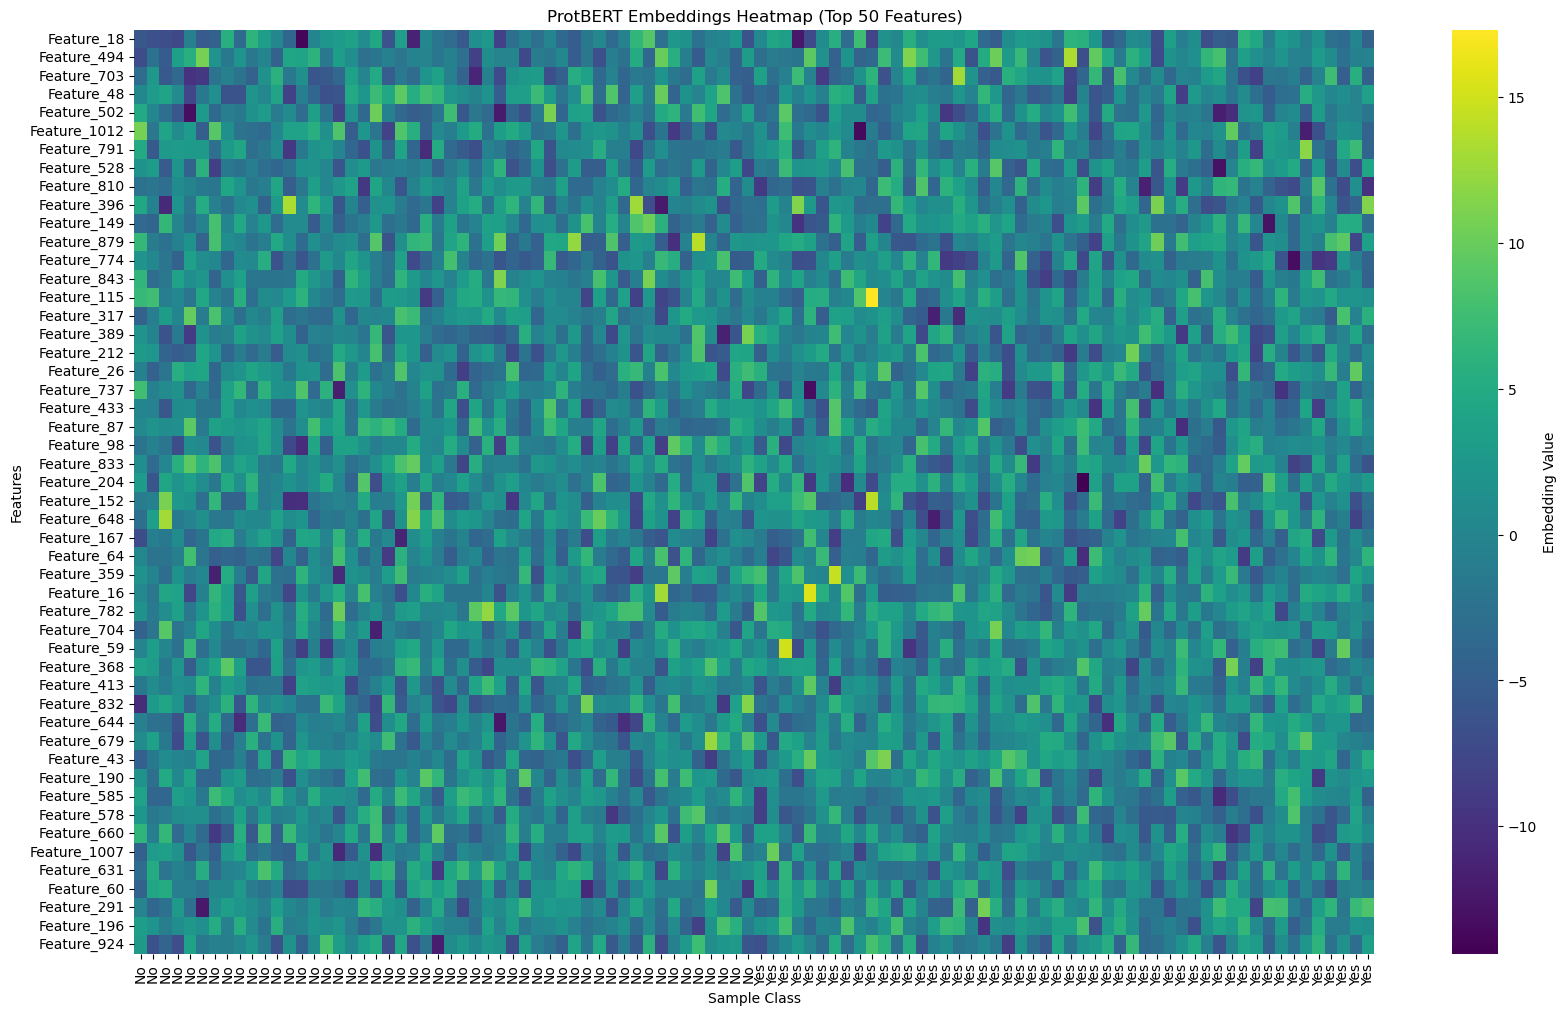

In [186]:
# Select top 50 features with highest variance
feature_variances = X_train_emb.var(axis=0)
top_features = feature_variances.argsort()[-50:][::-1]  # Indices of top 50 features

# Select a balanced subset of samples from each class
num_samples = 50  # Number of samples per class
indices_no = np.where(y_train == 0)[0][:num_samples]
indices_yes = np.where(y_train == 1)[0][:num_samples]
selected_indices = np.concatenate([indices_no, indices_yes])

# Create a DataFrame for the selected samples and features
df_subset = pd.DataFrame(X_train_emb[selected_indices][:, top_features],
                         columns=[f'Feature_{i}' for i in top_features])
df_subset['Class'] = y_train[selected_indices]

# Set class labels for coloring
class_labels = ['No'] * num_samples + ['Yes'] * num_samples

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_subset.drop('Class', axis=1).T, cmap='viridis', cbar=True,
            yticklabels=['Feature_' + str(i) for i in top_features],
            xticklabels=class_labels, cbar_kws={'label': 'Embedding Value'})
plt.title('ProtBERT Embeddings Heatmap (Top 50 Features)')
plt.xlabel('Sample Class')
plt.ylabel('Features')
plt.show()


### UMAP + CatBoost classification

In [196]:
import numpy as np
import pandas as pd
import umap
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import optuna
from optuna.integration import CatBoostPruningCallback
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Assume X, y are your complete embeddings and labels
# For demonstration, splitting into train and test sets
X_train_emb, X_test_emb, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Standardize the Embeddings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_emb)
X_test_scaled = scaler.transform(X_test_emb)

# Step 2: Apply UMAP for Dimensionality Reduction
umap_reducer = umap.UMAP(n_components=50, random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)
X_test_umap = umap_reducer.transform(X_test_scaled)

# Step 3: Define the Objective Function for Optuna
def objective(trial):
    # Define hyperparameter search space
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'od_type': 'Iter',
        'od_wait': 50,
        'verbose': False,
        'random_seed': 42
    }
    
    # Initialize CatBoost Classifier with sampled hyperparameters
    model = CatBoostClassifier(**params)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(
        model, X_train_umap, y_train, cv=5, scoring='roc_auc', n_jobs=-1
    )
    
    # Return the mean ROC-AUC score
    return scores.mean()

# Step 4: Create and Optimize the Optuna Study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, timeout=3600)  # Adjust n_trials and timeout as needed

# Display the best hyperparameters
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")
print(f"Best ROC-AUC: {study.best_value:.4f}")

# Step 5: Train the Final CatBoost Model with Best Hyperparameters
best_params = study.best_params
best_params.update({
    'od_type': 'Iter',
    'od_wait': 50,
    'verbose': 100,
    'random_seed': 42
})

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train_umap, y_train, eval_set=(X_test_umap, y_test), early_stopping_rounds=50, verbose=100)

# Step 6: Make Predictions and Evaluate the Model
y_pred = final_model.predict(X_test_umap)
y_proba = final_model.predict_proba(X_test_umap)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nCatBoost Classifier Performance with UMAP Preprocessing and Optuna Tuning:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


[I 2025-01-08 23:48:25,019] A new study created in memory with name: no-name-3e30ff3e-e772-4e6f-92e1-9403bdb0cb90
[I 2025-01-08 23:48:43,322] Trial 0 finished with value: 0.9098281395116192 and parameters: {'iterations': 437, 'depth': 10, 'learning_rate': 0.015702970884055395, 'l2_leaf_reg': 0.24810409748678125, 'border_count': 66, 'bagging_temperature': 0.15599452033620265, 'random_strength': 0.05808361216819946}. Best is trial 0 with value: 0.9098281395116192.
[I 2025-01-08 23:50:09,650] Trial 1 finished with value: 0.909043969185738 and parameters: {'iterations': 880, 'depth': 8, 'learning_rate': 0.013311216080736894, 'l2_leaf_reg': 0.0012087541473056963, 'border_count': 249, 'bagging_temperature': 0.8324426408004217, 'random_strength': 0.21233911067827616}. Best is trial 0 with value: 0.9098281395116192.
[I 2025-01-08 23:50:13,934] Trial 2 finished with value: 0.8885899235258883 and parameters: {'iterations': 263, 'depth': 5, 'learning_rate': 0.0008179499475211679, 'l2_leaf_reg': 0

Best Hyperparameters:
  iterations: 452
  depth: 7
  learning_rate: 0.013541067923001703
  l2_leaf_reg: 0.1014282965303533
  border_count: 171
  bagging_temperature: 0.3344134880100856
  random_strength: 0.4558758602937203
Best ROC-AUC: 0.9131
0:	learn: 0.6825882	test: 0.6834219	best: 0.6834219 (0)	total: 16.6ms	remaining: 7.49s
100:	learn: 0.3572374	test: 0.4128410	best: 0.4128410 (100)	total: 370ms	remaining: 1.28s
200:	learn: 0.2900399	test: 0.3936626	best: 0.3936564 (199)	total: 748ms	remaining: 934ms
300:	learn: 0.2457021	test: 0.3870086	best: 0.3868825 (298)	total: 1.06s	remaining: 531ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3852977801
bestIteration = 342

Shrink model to first 343 iterations.

CatBoost Classifier Performance with UMAP Preprocessing and Optuna Tuning:
Accuracy : 0.8150
Precision: 0.8229
Recall   : 0.8464
F1-Score : 0.8345
ROC-AUC  : 0.9059

Classification Report:
              precision    recall  f1-score   support

          No    

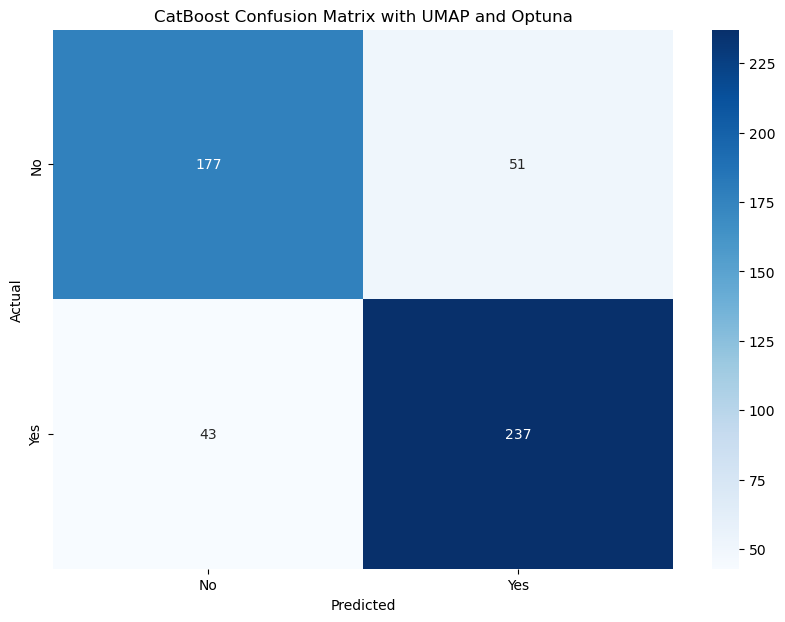

In [197]:
plot_confusion_matrix(y_test, y_pred, labels=['No', 'Yes'], title='CatBoost Confusion Matrix with UMAP and Optuna')

In [210]:
# Compare best catboost with descriptors and protbert embeddings + umap (f1 score)

results.append(evaluate_model(y_test, y_pred, "CatBoost from UMAP reduced ProtBert embeddings"))

# Create a DataFrame from the results
metrics_df = pd.DataFrame(results)
metrics_df.sort_values('F1-Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
4,CatBoost,0.881890,0.884615,0.903571,0.893993
2,Random Forest,0.860236,0.885609,0.857143,0.871143
5,CatBoost from UMAP reduced ProtBert embeddings,0.814961,0.822917,0.846429,0.834507
1,Decision Tree,0.805118,0.802676,0.857143,0.829016
0,Logistic Regression,0.801181,0.807560,0.839286,0.823117
3,SVM,0.596457,0.599469,0.807143,0.687976


In [214]:
final_model.save_model('catboost_umap_protbert_model.cbm')

In [215]:
best_params

{'iterations': 452,
 'depth': 7,
 'learning_rate': 0.013541067923001703,
 'l2_leaf_reg': 0.1014282965303533,
 'border_count': 171,
 'bagging_temperature': 0.3344134880100856,
 'random_strength': 0.4558758602937203,
 'od_type': 'Iter',
 'od_wait': 50,
 'verbose': 100,
 'random_seed': 42}

In [218]:
import numpy as np
import pandas as pd
import umap
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Assume X and y are your complete embeddings and labels
# Split the data into training and testing sets
X_train_emb, X_test_emb, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 1: Standardize the Embeddings
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_emb)
X_test_scaled = scaler.transform(X_test_emb)

# Step 2: Define the Best CatBoost Hyperparameters (from previous tuning)
best_catboost_params = best_params

# Step 3: Define the Objective Function for Optuna to Tune UMAP n_components
def objective(trial):
    # Suggest a value for n_components
    n_components = trial.suggest_int('n_components', 3, 200)
    
    # Initialize UMAP with the suggested n_components
    umap_reducer = umap.UMAP(n_components=n_components, random_state=42)
    
    # Fit UMAP on the training data and transform both training and testing data
    X_train_umap = umap_reducer.fit_transform(X_train_scaled)
    X_test_umap = umap_reducer.transform(X_test_scaled)
    
    # Initialize CatBoost with the best hyperparameters
    model = CatBoostClassifier(**best_catboost_params)
    
    # Train the model
    model.fit(X_train_umap, y_train, eval_set=(X_test_umap, y_test), early_stopping_rounds=50, verbose=False)
    
    # Predict probabilities on the test set
    y_proba = model.predict_proba(X_test_umap)[:, 1]
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    
    return roc_auc

# Step 4: Create and Optimize the Optuna Study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30, timeout=1800)  # Adjust n_trials and timeout as needed

# Display the best number of UMAP components
print(f"Best number of UMAP components: {study.best_params['n_components']}")
print(f"Best ROC-AUC: {study.best_value:.4f}")

# Step 5: Train the Final Model with the Best n_components
best_n_components = study.best_params['n_components']

# Initialize and fit UMAP with the best n_components
final_umap = umap.UMAP(n_components=best_n_components, random_state=42)
X_train_final_umap = final_umap.fit_transform(X_train_scaled)
X_test_final_umap = final_umap.transform(X_test_scaled)

# Initialize CatBoost with the best hyperparameters
final_model = CatBoostClassifier(**best_catboost_params)

# Train the final model
final_model.fit(X_train_final_umap, y_train, eval_set=(X_test_final_umap, y_test), early_stopping_rounds=50, verbose=100)

# Step 6: Make Predictions and Evaluate the Model
y_pred = final_model.predict(X_test_final_umap)
y_proba = final_model.predict_proba(X_test_final_umap)[:, 1]

# Calculate performance metrics
accuracy = (y_pred == y_test).mean()
roc_auc = roc_auc_score(y_test, y_proba)

print("\nFinal CatBoost Classifier Performance with Tuned UMAP:")
print(f"Number of UMAP components: {best_n_components}")
print(f"Accuracy : {accuracy:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


[I 2025-01-09 00:20:36,758] A new study created in memory with name: no-name-87016528-a22a-438b-85f5-a565d7d43d35
[I 2025-01-09 00:20:44,348] Trial 0 finished with value: 0.8983865914786966 and parameters: {'n_components': 77}. Best is trial 0 with value: 0.8983865914786966.
[I 2025-01-09 00:20:57,178] Trial 1 finished with value: 0.900563909774436 and parameters: {'n_components': 191}. Best is trial 1 with value: 0.900563909774436.
[I 2025-01-09 00:21:09,595] Trial 2 finished with value: 0.9075814536340852 and parameters: {'n_components': 147}. Best is trial 2 with value: 0.9075814536340852.
[I 2025-01-09 00:21:20,537] Trial 3 finished with value: 0.9098370927318297 and parameters: {'n_components': 121}. Best is trial 3 with value: 0.9098370927318297.
[I 2025-01-09 00:21:25,502] Trial 4 finished with value: 0.900908521303258 and parameters: {'n_components': 33}. Best is trial 3 with value: 0.9098370927318297.
[I 2025-01-09 00:21:30,395] Trial 5 finished with value: 0.900908521303258 a

Best number of UMAP components: 133
Best ROC-AUC: 0.9119
0:	learn: 0.6823993	test: 0.6833457	best: 0.6833457 (0)	total: 36.8ms	remaining: 16.6s
100:	learn: 0.3539799	test: 0.4050681	best: 0.4050681 (100)	total: 1.2s	remaining: 4.18s
200:	learn: 0.2810653	test: 0.3826748	best: 0.3824911 (195)	total: 2.48s	remaining: 3.1s
300:	learn: 0.2359514	test: 0.3738549	best: 0.3738549 (300)	total: 3.78s	remaining: 1.9s
400:	learn: 0.2009435	test: 0.3722501	best: 0.3703616 (367)	total: 5.16s	remaining: 656ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3703616155
bestIteration = 367

Shrink model to first 368 iterations.

Final CatBoost Classifier Performance with Tuned UMAP:
Number of UMAP components: 133
Accuracy : 0.8287
ROC-AUC  : 0.9119


In [219]:
results.append(evaluate_model(y_test, y_pred, "CatBoost with UMAP 133 components"))

# Create a DataFrame from the results
metrics_df = pd.DataFrame(results)
metrics_df.sort_values('F1-Score', ascending=False, inplace=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
4,CatBoost,0.881890,0.884615,0.903571,0.893993
2,Random Forest,0.860236,0.885609,0.857143,0.871143
6,CatBoost with UMAP 133 components,0.828740,0.838596,0.853571,0.846018
5,CatBoost from UMAP reduced ProtBert embeddings,0.814961,0.822917,0.846429,0.834507
1,Decision Tree,0.805118,0.802676,0.857143,0.829016
0,Logistic Regression,0.801181,0.807560,0.839286,0.823117
3,SVM,0.596457,0.599469,0.807143,0.687976


In [220]:
metrics_df.to_csv('baseline_metrics.csv', index=False)

# Interpretation of the best model results

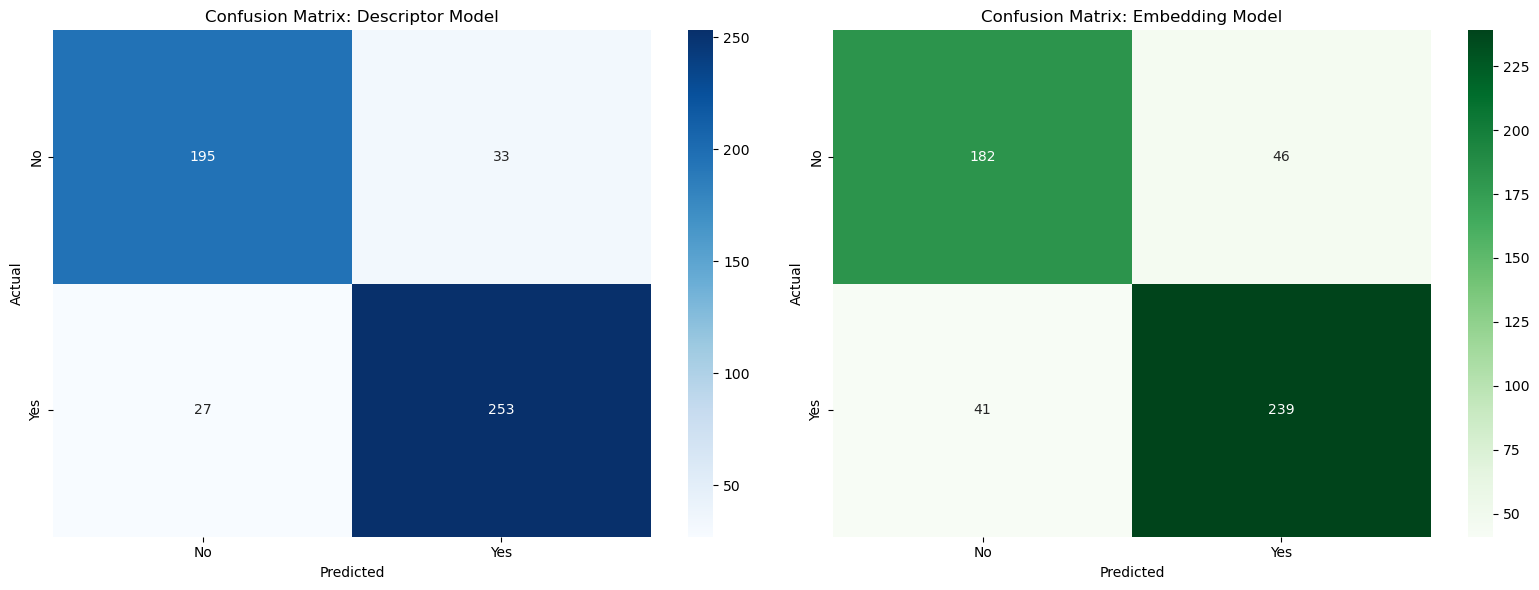

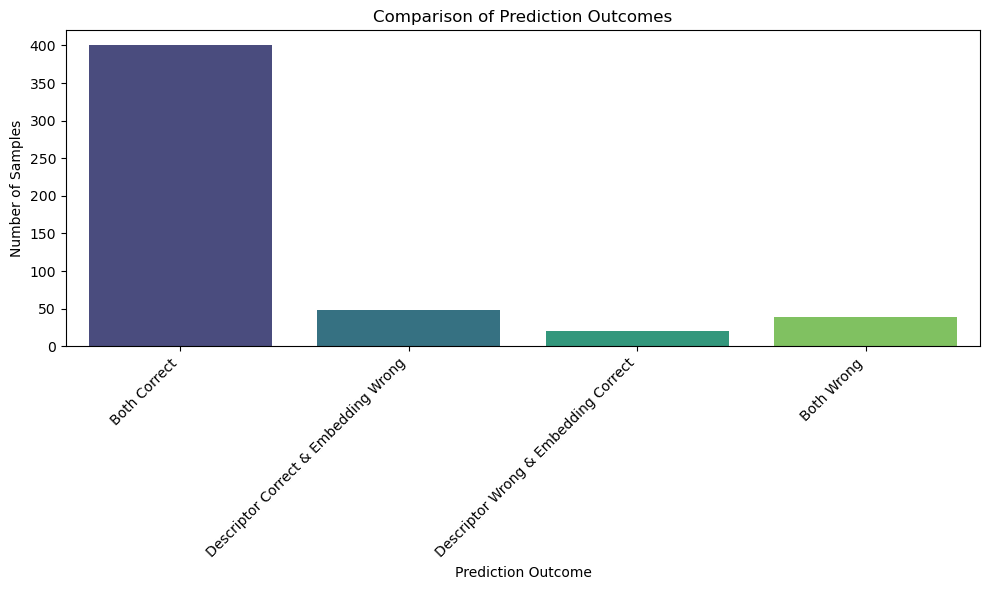

Prediction Outcome Counts:
Outcome
Both Correct                            400
Descriptor Correct & Embedding Wrong     48
Descriptor Wrong & Embedding Correct     21
Both Wrong                               39
Name: count, dtype: int64

Classification Report: Descriptor Model
              precision    recall  f1-score   support

          No       0.88      0.86      0.87       228
         Yes       0.88      0.90      0.89       280

    accuracy                           0.88       508
   macro avg       0.88      0.88      0.88       508
weighted avg       0.88      0.88      0.88       508

Classification Report: Embedding Model
              precision    recall  f1-score   support

          No       0.82      0.80      0.81       228
         Yes       0.84      0.85      0.85       280

    accuracy                           0.83       508
   macro avg       0.83      0.83      0.83       508
weighted avg       0.83      0.83      0.83       508



In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assume the following variables are already defined:
# - cat_clf: CatBoostClassifier trained on descriptors
# - final_model: CatBoostClassifier trained on embeddings (with UMAP)
# - X_test: Test set descriptors
# - X_test_final_umap: Test set embeddings after UMAP transformation
# - y_test: True labels

# Step 1: Make Predictions with Both Models
y_pred_cat = cat_clf.predict(X_test)
y_pred_final = final_model.predict(X_test_final_umap)

# Step 2: Compute Confusion Matrices
cm_cat = confusion_matrix(y_test, y_pred_cat)
cm_final = confusion_matrix(y_test, y_pred_final)

# Step 3: Create a Combined DataFrame for Comparison
comparison_df = pd.DataFrame({
    'y_true': y_test,
    'Descriptor_Pred': y_pred_cat,
    'Embedding_Pred': y_pred_final
})

# Step 4: Determine Correctness for Each Model
comparison_df['Descriptor_Correct'] = comparison_df['Descriptor_Pred'] == comparison_df['y_true']
comparison_df['Embedding_Correct'] = comparison_df['Embedding_Pred'] == comparison_df['y_true']

# Step 5: Categorize the Prediction Outcomes
# 1: Both Correct
# 2: Descriptor Correct, Embedding Wrong
# 3: Descriptor Wrong, Embedding Correct
# 4: Both Wrong
conditions = [
    (comparison_df['Descriptor_Correct'] & comparison_df['Embedding_Correct']),
    (comparison_df['Descriptor_Correct'] & ~comparison_df['Embedding_Correct']),
    (~comparison_df['Descriptor_Correct'] & comparison_df['Embedding_Correct']),
    (~comparison_df['Descriptor_Correct'] & ~comparison_df['Embedding_Correct'])
]
choices = ['Both Correct', 'Descriptor Correct & Embedding Wrong',
           'Descriptor Wrong & Embedding Correct', 'Both Wrong']
comparison_df['Outcome'] = np.select(conditions, choices)

# Step 6: Compute the Counts for Each Outcome
outcome_counts = comparison_df['Outcome'].value_counts().reindex(choices)

# Step 7: Plot Individual Confusion Matrices Side by Side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix for Descriptor Model
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0].set_title('Confusion Matrix: Descriptor Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for Embedding Model
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[1].set_title('Confusion Matrix: Embedding Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Step 8: Plot the Comparison of Outcomes
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.title('Comparison of Prediction Outcomes')
plt.xlabel('Prediction Outcome')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 9: Display the Counts for Each Category
print("Prediction Outcome Counts:")
print(outcome_counts)

# Optional: Display Classification Reports for Both Models
print("\nClassification Report: Descriptor Model")
print(classification_report(y_test, y_pred_cat, target_names=['No', 'Yes']))

print("Classification Report: Embedding Model")
print(classification_report(y_test, y_pred_final, target_names=['No', 'Yes']))
